There's been various concerns about the SHAMs I've made being done correctly. I'm going to take a look at the clustering of them all in the same notebook for easy comparison.

In [12]:
import numpy as np
import astropy
from halotools.mock_observables import tpcf

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [14]:
%%bash
ls ../*.hdf5

../catalog_ab_halo_mpeak_fixed.hdf5
../catalog_ab_halo_mpeak_fixed_large.hdf5
../catalog_ab_halo_mpeak_shuffled_fixed.hdf5
../catalog_ab_halo_vmax@mpeak.hdf5
../catalog_ab_halo_vmax@mpeak_2.hdf5
../catalog_ab_halo_vmax@mpeak_fixed.hdf5
../catalog_ab_halo_vmax@mpeak_fixed_large.hdf5
../catalog_ab_halo_vmax@mpeak_shuffled.hdf5
../catalog_ab_halo_vmax@mpeak_shuffled_fixed.hdf5
../catalog_gama_downsampled_mag_16.hdf5
../md_catalog_ab_halo_mpeak_fixed.hdf5
../md_catalog_ab_halo_mpeak_fixed_large.hdf5
../md_catalog_ab_halo_vmax@mpeak.hdf5
../md_catalog_ab_halo_vmax@mpeak_2.hdf5
../md_catalog_ab_halo_vmax@mpeak_fixed.hdf5
../md_catalog_ab_halo_vmax@mpeak_fixed_large.hdf5
../md_catalog_ab_halo_vmax@mpeak_shuffled_fixed.hdf5


In [15]:
simname = 'darksky'

if simname == 'darksky':
    vpeak_cat = astropy.table.Table.read('../catalog_ab_halo_vmax@mpeak_fixed.hdf5', format = 'hdf5',\
                                        path = 'catalog_ab_halo_vmax@mpeak.hdf5')
    mpeak_cat = astropy.table.Table.read('../catalog_ab_halo_mpeak_fixed.hdf5', format = 'hdf5',\
                                         path = 'catalog_ab_halo_mpeak.hdf5')
    shuffled_cat = astropy.table.Table.read('../catalog_ab_halo_vmax@mpeak_shuffled_fixed.hdf5', format = 'hdf5',\
                                           path = '../catalog_ab_halo_vmax@mpeak_shuffled_fixed.hdf5')
    shuffled_cat_mpeak = astropy.table.Table.read('../catalog_ab_halo_mpeak_shuffled_fixed.hdf5', format = 'hdf5',\
                                           path = '../catalog_ab_halo_mpeak_shuffled_fixed.hdf5')
    
elif simname == 'multidark':
    vpeak_cat = astropy.table.Table.read('../md_catalog_ab_halo_vmax@mpeak_fixed.hdf5', format = 'hdf5',\
                                        path = 'md_catalog_ab_halo_vmax@mpeak.hdf5')
    mpeak_cat = astropy.table.Table.read('../md_catalog_ab_halo_mpeak_fixed.hdf5', format = 'hdf5',\
                                         path = 'md_catalog_ab_halo_mpeak.hdf5')
    shuffled_cat = astropy.table.Table.read('../md_catalog_ab_halo_mpeak_shuffled_fixed.hdf5', format = 'hdf5',\
                                           path = '../md_catalog_ab_halo_mpeak_shuffled_fixed.hdf5')

In [16]:
rbins = np.logspace(-1, 1.5, 15)
rpoints = (rbins[1:]+rbins[:-1])/2

In [17]:
pos = np.c_[vpeak_cat['halo_x'], vpeak_cat['halo_y'],vpeak_cat['halo_z']]
vpeak_xi = tpcf(pos, rbins, period=1000.0)

In [18]:
pos = np.c_[mpeak_cat['halo_x'], mpeak_cat['halo_y'],mpeak_cat['halo_z']]
mpeak_xi = tpcf(pos, rbins, period=1000.0)

In [19]:
pos = np.c_[shuffled_cat['halo_x'], shuffled_cat['halo_y'],shuffled_cat['halo_z']]
shuffled_xi = tpcf(pos, rbins, period=1000.0)

In [20]:
pos = np.c_[shuffled_cat_mpeak['halo_x'], shuffled_cat_mpeak['halo_y'],shuffled_cat_mpeak['halo_z']]
shuffled_xi_mpeak = tpcf(pos, rbins, period=1000.0)

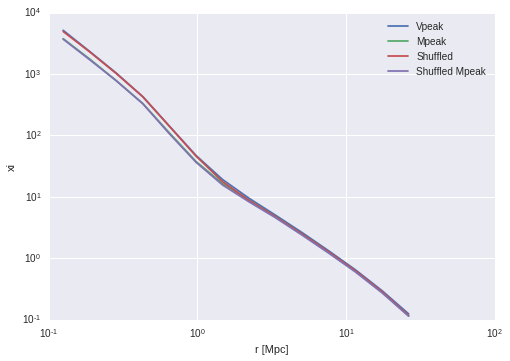

In [21]:
plt.plot(rpoints, vpeak_xi, label = 'Vpeak')
plt.plot(rpoints, mpeak_xi, label = 'Mpeak')
plt.plot(rpoints, shuffled_xi, label = 'Shuffled')
plt.plot(rpoints, shuffled_xi_mpeak, label = 'Shuffled Mpeak')

plt.loglog();
plt.legend(loc='best')
plt.xlabel('r [Mpc]')
plt.ylabel('xi')

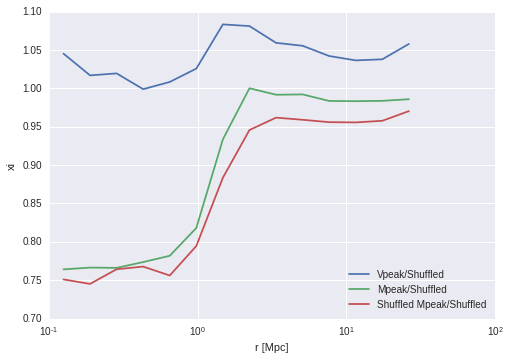

In [22]:
plt.plot(rpoints, vpeak_xi/shuffled_xi, label = 'Vpeak/Shuffled')
plt.plot(rpoints, mpeak_xi/shuffled_xi, label = 'Mpeak/Shuffled')
plt.plot(rpoints, shuffled_xi_mpeak/shuffled_xi, label = 'Shuffled Mpeak/Shuffled')

plt.xscale('log');
plt.legend(loc='best')
plt.xlabel('r [Mpc]')
plt.ylabel('xi')

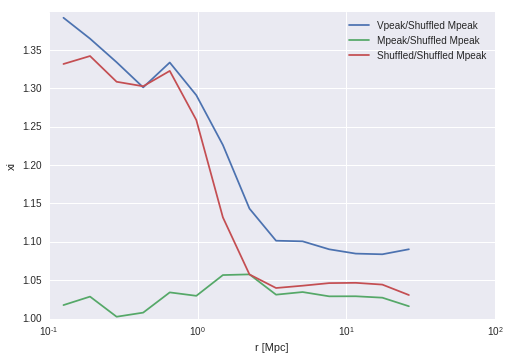

In [24]:
plt.plot(rpoints, vpeak_xi/shuffled_xi_mpeak, label = 'Vpeak/Shuffled Mpeak')
plt.plot(rpoints, mpeak_xi/shuffled_xi_mpeak, label = 'Mpeak/Shuffled Mpeak')
plt.plot(rpoints, shuffled_xi/shuffled_xi_mpeak, label = 'Shuffled/Shuffled Mpeak')

plt.xscale('log');
plt.legend(loc='best')
plt.xlabel('r [Mpc]')
plt.ylabel('xi')